In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
train_data = np.loadtxt("Datasets/DigitTrain.csv", delimiter=',',skiprows=1)
train_data.shape

(42000, 785)

In [3]:
test_data = np.loadtxt("Datasets/DigitTest.csv", delimiter=',',skiprows=1)
test_data.shape

(28000, 784)

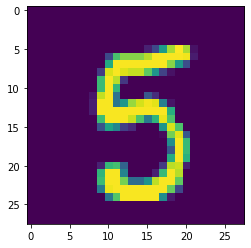

In [4]:
plt.imshow(test_data[10].reshape((28,28)))
plt.show()

In [5]:
x_train = train_data[:,1:]
y_train = train_data[:,0]

In [6]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

In [7]:
test_data = scaler.transform(test_data)

In [8]:
x_train = np.reshape(x_train, (42000,28,28,1))

In [9]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes= 10)
x_train.shape , y_train.shape

Using TensorFlow backend.


((42000, 28, 28, 1), (42000, 10))

In [10]:
x_test = np.reshape(test_data, (28000,28,28,1))
x_test.shape

(28000, 28, 28, 1)

In [11]:
x_train[0], x_test[0]

(array([[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],
 
        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
        

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.3)

In [14]:
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout

In [15]:
from keras.models import Sequential
model = Sequential() ## creating a model

In [16]:
Conv1 = Conv2D(filters = 32, kernel_size = (3,3), padding="same",input_shape = (28,28,1), activation = "relu")

In [17]:
model.add(Conv1)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [18]:
max_pool1 = MaxPooling2D(pool_size=(2, 2), padding='same')

In [19]:
model.add(max_pool1)

In [20]:
Conv2 = Conv2D(filters = 32, kernel_size = (3,3),strides = (1,1) , padding = "same", activation = "relu")

In [21]:
model.add(Conv2)

In [22]:
max_pool2 = MaxPooling2D(pool_size=(2, 2), padding='same')

In [23]:
model.add(max_pool2)

In [24]:
model.add(Flatten())

In [25]:
layer1 = Dense(units = 10, activation = "relu")
model.add(layer1)

In [26]:
output_layer = Dense(units = 10, activation = "sigmoid")
model.add(output_layer)

In [27]:
model.add(Dropout(0.10))

In [28]:
model.compile(optimizer = "adam",loss = "binary_crossentropy", metrics = ["accuracy"])

In [37]:
model.fit(x_train, y_train, epochs = 5, batch_size = 50, validation_data = (X_val, Y_val) )

Train on 42000 samples, validate on 12600 samples
Epoch 1/5
42000/42000 [==============================] - 36s 866us/step - loss: 0.2047 - accuracy: 0.9783 - val_loss: 0.0422 - val_accuracy: 0.9871
Epoch 2/5
42000/42000 [==============================] - 36s 864us/step - loss: 0.2080 - accuracy: 0.9766 - val_loss: 0.0340 - val_accuracy: 0.9898
Epoch 3/5
42000/42000 [==============================] - 36s 854us/step - loss: 0.1926 - accuracy: 0.9803 - val_loss: 0.0293 - val_accuracy: 0.9915
Epoch 4/5
42000/42000 [==============================] - 36s 856us/step - loss: 0.1775 - accuracy: 0.9828 - val_loss: 0.0278 - val_accuracy: 0.9918
Epoch 5/5
42000/42000 [==============================] - 37s 879us/step - loss: 0.1784 - accuracy: 0.9833 - val_loss: 0.0253 - val_accuracy: 0.9930


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                15690     
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [31]:
y_pred = model.predict(x_test)

In [32]:
Y_pred_classes = np.argmax(y_pred, axis = 1) 
Y_pred_classes

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [33]:
df = pd.DataFrame(np.arange(1,len(Y_pred_classes)+1), columns = ["ImageID"])
df

,ImageID
0,1
1,2
2,3
3,4
4,5
...,...
27995,27996
27996,27997
27997,27998
27998,27999


In [34]:
df["Label"] = Y_pred_classes

In [35]:
df

,ImageID,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [36]:
df.to_csv("preds.csv", index = False)